In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('train.csv')

In [9]:
X = df[['date']]
y = df['sales']

In [10]:
X['date'] = pd.to_datetime(X['date'])
X['date'] = X['date'].apply(lambda x: x.timestamp())

C:\Users\Sailesh\AppData\Local\Temp\ipykernel_10132\3897040293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = pd.to_datetime(X['date'])
C:\Users\Sailesh\AppData\Local\Temp\ipykernel_10132\3897040293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = X['date'].apply(lambda x: x.timestamp())


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
y_train_pred = model.predict(X_train)

In [15]:
sorted_train_data = X_train.sort_values(by='date')
sorted_train_pred = y_train_pred[X_train['date'].argsort()]

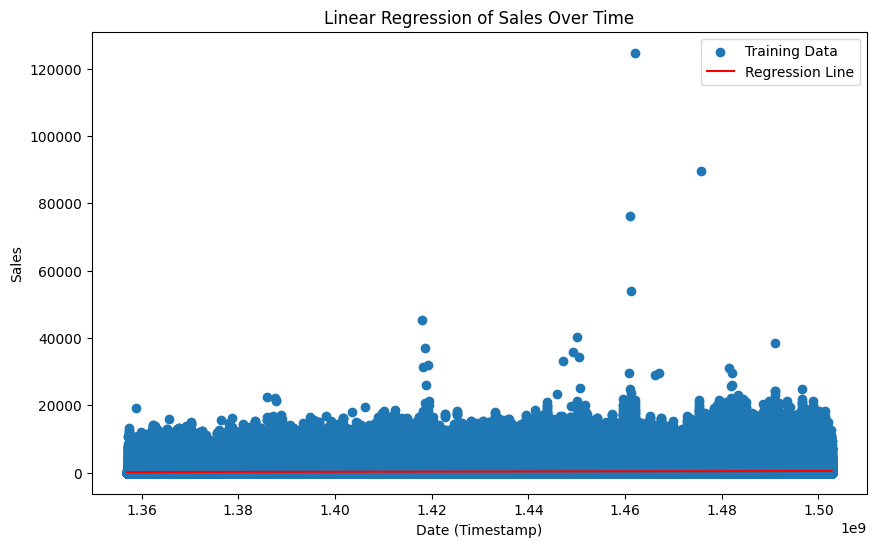

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X_train['date'], y_train, label='Training Data')
plt.plot(sorted_train_data['date'], sorted_train_pred, color='red', label='Regression Line')
plt.xlabel('Date (Timestamp)')
plt.ylabel('Sales')
plt.title('Linear Regression of Sales Over Time')
plt.legend()
plt.show()
